In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy.io import fits
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
import astropy.units as u

In [9]:
#getting Fermi threshold values
filename = "detthresh_P8R3_12years_PL22.fits"

# Open the FITS file
with fits.open(filename) as hdul:
    # 2D array in Galactic coordinates
    data = hdul[0].data
    header = hdul[0].header
    
wcs_Fermi = WCS(header)

four_lac = pd.read_excel('exported_dataFrames/4lacsutter_w_voidiness_dup_drop_above_z0_1.xlsx')
FLac_celestial = SkyCoord(four_lac.RAdeg.values* u.degree, four_lac.DEdeg.values* u.degree, frame='icrs')
# Transform to galactic coordinates
FLac_galactic = FLac_celestial.transform_to('galactic')
#convert to pixels
pix_x, pix_y = wcs_Fermi.wcs_world2pix(FLac_galactic.l, FLac_galactic.b, 1)


int_pix_x = np.round(pix_x).astype(int)
int_pix_y = np.round(pix_y).astype(int)
sensitivity_4lac =[]
for i in range(len(pix_x)):
    sensitivity_4lac.append(data[int_pix_y[i],int_pix_x[i]])

In [10]:
fourlac_sutter = pd.read_excel('exported_dataFrames/4lacsutter_w_voidiness_dup_drop_above_z0_1.xlsx')

In [19]:
#below functions are coming from Olivier's sensitivity_ratio.pdf
from IPython.display import IFrame

# Display the PDF inline
IFrame("Sensitivity_ratio.pdf", width=600, height=400)

In [11]:
def fermi_threshold(voidiness):
    a = 6.4e-14
    b = 1.1e-12
    return a*voidiness + b

In [12]:
def threshold_func(pl_index):
    a = 0.75
    b = -0.76
    return a*pl_index + b

In [13]:
x = np.linspace(1.25, 3.25, len(fourlac_sutter))
threshold = threshold_func(x)
fourlac_fermi_threshold = fermi_threshold(fourlac_sutter.Voidiness)

Text(0, 0.5, 'Fermi sensitivity')

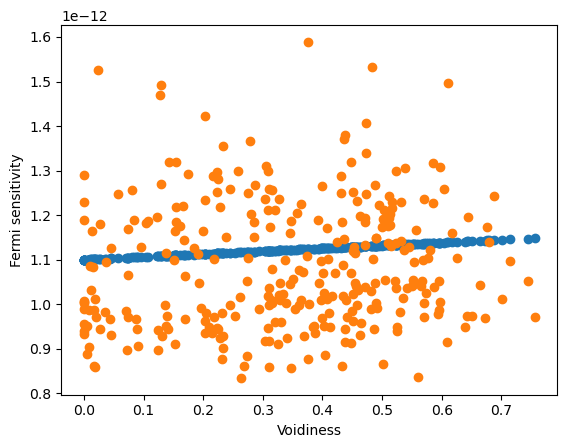

In [14]:
plt.scatter(fourlac_sutter['Voidiness'], fermi_threshold(fourlac_sutter.Voidiness))
plt.scatter(fourlac_sutter.Voidiness, sensitivity_4lac)
plt.xlabel("Voidiness")
plt.ylabel("Fermi sensitivity")

#successfully reproduced Olivier's plot from Fermi_exposure.ipynb

In [16]:
#using Olivier's f = ax + b function to find the threshold ratio
threshold_ratios = threshold_func(fourlac_sutter['PL_Index'])
#If you have a source with spectral index =3, 
#the detection threshold is about 1.5 times the threshold value of in the associated pixel position of the threshold map
final_thresholds = threshold_ratios * sensitivity_4lac

#final thresholds then takes into consideration the PL index of each 4lac source and the sensitivity at that location
#so its just a matter of whether the flux is greater than that value for each percentage decrease

1. Need to make a new file of the remaining 4LAC sources, dup drop z > 0.1
2. keep original SDSS sources
3. Run redshift_matched_check.py to create new redshift matched samples
4. run stat test

In [105]:
#1% decrease per Mpc of void
nolonger_detected = fourlac_sutter.FluxInc1 < final_thresholds
print(f'Removes {(len(fourlac_sutter[nolonger_detected])/len(fourlac_sutter))*100} %')

Removes 0.0 %


In [106]:
#2% decrease per Mpc of void
nolonger_detected = fourlac_sutter.FluxInc2 < final_thresholds
print(f'Removes {(len(fourlac_sutter[nolonger_detected])/len(fourlac_sutter))*100} %')

Removes 0.0 %


# 5%

In [107]:
#5% decrease per Mpc of void
nolonger_detected = fourlac_sutter.FluxInc5 < final_thresholds
print(f'Removes {(len(fourlac_sutter[nolonger_detected])/len(fourlac_sutter))*100} %')

Removes 0.33003300330033003 %


In [116]:
still_detected = fourlac_sutter.FluxInc5 > final_thresholds
temp = fourlac_sutter[still_detected]
temp = temp.drop_duplicates(subset=['RAdeg', 'DEdeg'], keep='first')
temp[temp.z > 0.1].to_excel("4LAC Flux Adjusted Sources/4lacsutter_w_voidiness_dup_drop_above_z0_1_flux5.xlsx")

#run redshift_matched_check_og.py

#run Void_KS_z_matched.py

### 0.1-0.4
median P-value: 0.4713414159270756

Significance (one-tail): 0.07189831394712656 Sigma

### 0.4-0.7
median P-value: 3.1872574331486716e-05

Significance (one-tail): 3.998500120376818 Sigma


# 7.5%

In [117]:
#7.5% decrease per Mpc of void
nolonger_detected = fourlac_sutter['FluxInc7.5'] < final_thresholds
print(f'Removes {(len(fourlac_sutter[nolonger_detected])/len(fourlac_sutter))*100} %')

Removes 0.9900990099009901 %


In [118]:
still_detected = fourlac_sutter['FluxInc7.5'] > final_thresholds
temp = fourlac_sutter[still_detected]
temp = temp.drop_duplicates(subset=['RAdeg', 'DEdeg'], keep='first')
temp[temp.z > 0.1].to_excel("4LAC Flux Adjusted Sources/4lacsutter_w_voidiness_dup_drop_above_z0_1_flux7_5.xlsx")

#run redshift_matched_check_og.py

#run Void_KS_z_matched.py

### 0.1-0.4
median P-value: 0.44502021507589895

Significance (one-tail): 0.13825304951133183 Sigma

### 0.4-0.7
median P-value: 5.246562892081577e-05

Significance (one-tail): 3.8788967956204217 Sigma

# 10%

In [119]:
#10% decrease per Mpc of void
nolonger_detected = fourlac_sutter.FluxInc10 < final_thresholds
print(f'Removes {(len(fourlac_sutter[nolonger_detected])/len(fourlac_sutter))*100} %')

Removes 3.3003300330033 %


In [120]:
still_detected = fourlac_sutter.FluxInc10 > final_thresholds
temp = fourlac_sutter[still_detected]
temp = temp.drop_duplicates(subset=['RAdeg', 'DEdeg'], keep='first')
temp[temp.z > 0.1].to_excel("4LAC Flux Adjusted Sources/4lacsutter_w_voidiness_dup_drop_above_z0_1_flux10.xlsx")

#run redshift_matched_check_og.py

#run Void_KS_z_matched.py

### 0.1-0.4
median P-value: 0.4063091170802577

Significance (one-tail): 0.23704969955554175 Sigma

### 0.4-0.7
median P-value: 0.00036836666458281154

Significance (one-tail): 3.375531219119918 Sigma

# 15%

In [121]:
#15% decrease per Mpc of void
nolonger_detected = fourlac_sutter.FluxInc15 < final_thresholds
print(f'Removes {(len(fourlac_sutter[nolonger_detected])/len(fourlac_sutter))*100} %')

Removes 7.590759075907591 %


In [122]:
still_detected = fourlac_sutter.FluxInc15 > final_thresholds
temp = fourlac_sutter[still_detected]
temp = temp.drop_duplicates(subset=['RAdeg', 'DEdeg'], keep='first')
temp[temp.z > 0.1].to_excel("4LAC Flux Adjusted Sources/4lacsutter_w_voidiness_dup_drop_above_z0_1_flux15.xlsx")

#run redshift_matched_check_og.py

#run Void_KS_z_matched.py

### 0.1-0.4
median P-value: 0.3125779759364997

Significance (one-tail): 0.48855616708035626 Sigma

### 0.4-0.7
median P-value: 0.00330655862393789

Significance (one-tail): 2.7157232521012813 Sigma

# 20%

In [123]:
#20% decrease per Mpc of void
nolonger_detected = fourlac_sutter.FluxInc20 < final_thresholds
print(f'Removes {(len(fourlac_sutter[nolonger_detected])/len(fourlac_sutter))*100} %')

Removes 13.531353135313532 %


In [124]:
still_detected = fourlac_sutter.FluxInc20 > final_thresholds
temp = fourlac_sutter[still_detected]
temp = temp.drop_duplicates(subset=['RAdeg', 'DEdeg'], keep='first')
temp[temp.z > 0.1].to_excel("4LAC Flux Adjusted Sources/4lacsutter_w_voidiness_dup_drop_above_z0_1_flux20.xlsx")

#run redshift_matched_check_og.py

#run Void_KS_z_matched.py

### 0.1-0.4 
median P-value: 0.17250555450678784

Significance (one-tail): 0.9443102902338967 Sigma

### 0.4-0.7
median P-value: 0.047768663785600504

Significance (one-tail): 1.666884731129802 Sigma

# 25%

In [134]:
#25% decrease per Mpc of void
nolonger_detected = fourlac_sutter.FluxInc25 < final_thresholds
print(f'Removes {(len(fourlac_sutter[nolonger_detected])/len(fourlac_sutter))*100} %')

Removes 23.432343234323433 %


In [135]:
still_detected = fourlac_sutter.FluxInc25 > final_thresholds
temp = fourlac_sutter[still_detected]
temp = temp.drop_duplicates(subset=['RAdeg', 'DEdeg'], keep='first')
temp[temp.z > 0.1].to_excel("4LAC Flux Adjusted Sources/4lacsutter_w_voidiness_dup_drop_above_z0_1_flux25.xlsx")

#run redshift_matched_check_og.py

#run Void_KS_z_matched.py

### 0.1-0.4
median P-value: 0.06719539076823887

Significance (one-tail): 1.4970095177346732 Sigma

### 0.4-0.7
median P-value: 0.8290991332366655

Significance (one-tail): -0.950611293465323 Sigma

# 50%

In [127]:
#50% decrease per Mpc of void
nolonger_detected = fourlac_sutter.FluxInc50 < final_thresholds
print(f'Removes {(len(fourlac_sutter[nolonger_detected])/len(fourlac_sutter))*100} %')

Removes 48.51485148514851 %


In [130]:
still_detected = fourlac_sutter.FluxInc50 > final_thresholds
temp = fourlac_sutter[still_detected]
temp = temp.drop_duplicates(subset=['RAdeg', 'DEdeg'], keep='first')
temp[temp.z > 0.1].to_excel("4LAC Flux Adjusted Sources/4lacsutter_w_voidiness_dup_drop_above_z0_1_flux50.xlsx")

#run redshift_matched_check_og.py

#run Void_KS_z_matched.py

### 0.1-0.4
median P-value: 0.0005053088199290864

Significance (one-tail): 3.2875541146194953 Sigma

### 0.4-0.7
median P-value: 0.20583195526957915

Significance (one-tail): 0.8209690274940937 Sigma

# 60%

In [17]:
#60% decrease per Mpc of void
nolonger_detected = fourlac_sutter.FluxInc60 < final_thresholds
print(f'Removes {(len(fourlac_sutter[nolonger_detected])/len(fourlac_sutter))*100} %')

Removes 52.475247524752476 %


In [ ]:
still_detected = fourlac_sutter.FluxInc60 > final_thresholds
temp = fourlac_sutter[still_detected]
temp = temp.drop_duplicates(subset=['RAdeg', 'DEdeg'], keep='first')
temp[temp.z > 0.1].to_excel("4LAC Flux Adjusted Sources/4lacsutter_w_voidiness_dup_drop_above_z0_1_flux60.xlsx")

#run redshift_matched_check_og.py

#run Void_KS_z_matched.py

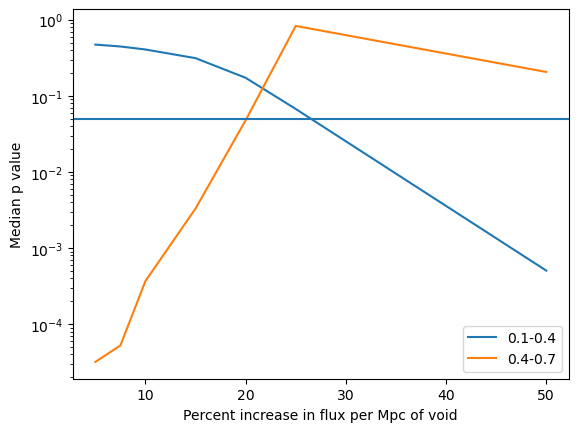

In [137]:
low_p = [0.4713414159270756, 0.44502021507589895,0.4063091170802577, 0.3125779759364997, 0.17250555450678784, 0.06719539076823887, 0.0005053088199290864]
high_p = [3.1872574331486716e-05, 5.246562892081577e-05, 0.00036836666458281154, 0.00330655862393789, 0.047768663785600504, 0.8290991332366655, 0.20583195526957915 ]

percents = [5, 7.5, 10, 15, 20, 25, 50]

plt.plot(percents, low_p, label = "0.1-0.4")
plt.plot(percents, high_p, label = "0.4-0.7")
plt.axhline(0.05)
plt.xlabel("Percent increase in flux per Mpc of void")
plt.ylabel("Median p value")
plt.yscale('log')
plt.legend()

In [4]:
fourlac_sutter

,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Source_Name,DataRelease,RAdeg,DEdeg,GLON,GLAT,...,Void_Dist_Mpc,FluxInc1,FluxInc2,FluxInc5,FluxInc7.5,FluxInc10,FluxInc15,FluxInc20,FluxInc25,FluxInc50
0,0,0,1107,1107,4FGL J0748.6+2400,1,117.163803,24.016600,196.602417,22.733208,...,489.765734,1.131446e-10,6.181276e-11,2.618019e-11,1.768474e-11,1.335202e-11,8.961115e-12,6.743476e-12,5.405707e-12,2.713846e-12
1,1,1,1108,1108,4FGL J0749.2+2314,1,117.321701,23.233700,197.450912,22.589090,...,163.313342,5.796634e-11,3.577674e-11,1.665270e-11,1.152078e-11,8.806772e-12,5.986316e-12,4.534195e-12,3.649036e-12,1.846592e-12
2,2,2,1120,1120,4FGL J0751.4+2655,1,117.866402,26.927500,193.857742,24.328171,...,128.195706,5.662992e-11,3.625987e-11,1.744005e-11,1.217437e-11,9.351017e-12,6.388095e-12,4.851021e-12,3.910174e-12,1.985120e-12
3,3,5,1132,1132,4FGL J0759.6+1321,1,119.900398,13.362700,208.280777,21.047293,...,128.179761,1.177707e-10,7.540950e-11,3.627067e-11,2.531958e-11,1.944778e-11,1.328568e-11,1.008896e-11,8.132226e-12,4.128582e-12
4,4,6,1161,1161,4FGL J0809.3+3121,3,122.348000,31.353300,190.450134,29.394068,...,486.898475,1.680276e-11,9.183780e-12,3.890923e-12,2.628519e-12,1.984614e-12,1.332011e-12,1.002393e-12,8.035482e-13,4.034177e-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,298,322,2534,2534,4FGL J1644.9+2620,1,251.231796,26.346500,46.254990,38.359512,...,259.617914,7.249095e-11,4.209873e-11,1.864619e-11,1.273441e-11,9.668884e-12,6.526613e-12,4.925790e-12,3.955580e-12,1.992910e-12
299,299,323,2542,2542,4FGL J1647.5+2911,1,251.883499,29.183701,49.947308,38.481014,...,93.256524,9.780578e-11,6.597119e-11,3.337840e-11,2.364403e-11,1.830548e-11,1.261076e-11,9.618499e-12,7.773918e-12,3.968569e-12
300,300,324,2553,2553,4FGL J1652.7+4024,1,253.197495,40.405201,64.404144,39.120182,...,288.988471,7.707445e-11,4.422138e-11,1.940595e-11,1.322259e-11,1.002750e-11,6.760370e-12,5.099022e-12,4.093140e-12,2.060636e-12
301,301,326,2567,2567,4FGL J1702.6+3114,1,255.670105,31.246099,53.378227,35.746689,...,612.444258,4.584839e-11,2.465447e-11,1.032958e-11,6.959751e-12,5.247766e-12,3.517347e-12,2.645131e-12,2.119538e-12,1.063218e-12
